In [112]:
import pandas as pd
from pydataset import data
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df=data('mtcars')

In [114]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In [116]:
df.isna().head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,False,False,False,False,False,False,False,False,False,False,False
Mazda RX4 Wag,False,False,False,False,False,False,False,False,False,False,False
Datsun 710,False,False,False,False,False,False,False,False,False,False,False
Hornet 4 Drive,False,False,False,False,False,False,False,False,False,False,False
Hornet Sportabout,False,False,False,False,False,False,False,False,False,False,False
Valiant,False,False,False,False,False,False,False,False,False,False,False
Duster 360,False,False,False,False,False,False,False,False,False,False,False
Merc 240D,False,False,False,False,False,False,False,False,False,False,False
Merc 230,False,False,False,False,False,False,False,False,False,False,False
Merc 280,False,False,False,False,False,False,False,False,False,False,False


In [117]:
X = df[['mpg', 'hp', 'wt']]
y = df['am']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [119]:
model = GaussianNB()
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [120]:
pred = model.predict(X_test)
pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [121]:
accuracy_score(y_test, pred)

0.7

In [122]:
cm = confusion_matrix(y_test, pred)
cm

array([[4, 1],
       [2, 3]])

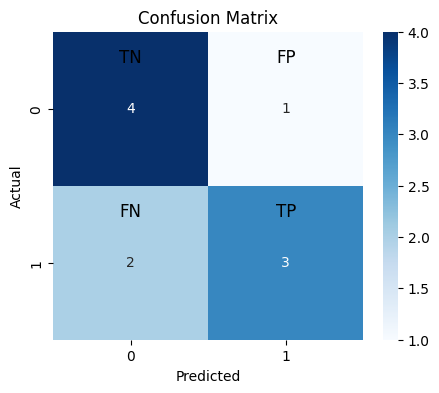

In [123]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")

# Labels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Custom text labels
plt.text(0.50, 0.2, "TN", fontsize=12, color="black", ha='center')
plt.text(1.50, 0.2, "FP", fontsize=12, color="black", ha='center')
plt.text(0.50, 1.20, "FN", fontsize=12, color="black", ha='center')
plt.text(1.50, 1.20, "TP", fontsize=12, color="black", ha='center')

plt.show()